## Set up

In [1]:
# Make Jupyter to automatically display matplotlib plots.
%matplotlib inline
# Make plots larger.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

In [41]:
import pandas as pd
city = pd.read_csv("C:/Users/lenovo/Documents/Python Scripts/project/city_plot.csv")
city.head()


,Unnamed: 0,counts,city,size
0,0,3,Westlake Village,0.5
1,1,3,Newark,0.5
2,2,4,Loma Linda,0.5
3,3,672,San Francisco,10.0
4,4,1,Contra Costa County,0.5


In [39]:
def count_category(number):
    if number>600:
        return 20
    elif number>200:
        return 10
    elif number>100:
        return 8
    elif number>50:
        return 6
    elif number>10:
        return 4
    else:
        return 2

In [42]:
city['category']=[count_category(x) for x in city['counts']]
cities = city[['city','category']]
cities.head()

,Unnamed: 0,counts,city,size,category
0,0,3,Westlake Village,0.5,2
1,1,3,Newark,0.5,2
2,2,4,Loma Linda,0.5,2
3,3,672,San Francisco,10.0,20
4,4,1,Contra Costa County,0.5,2


## Basemap

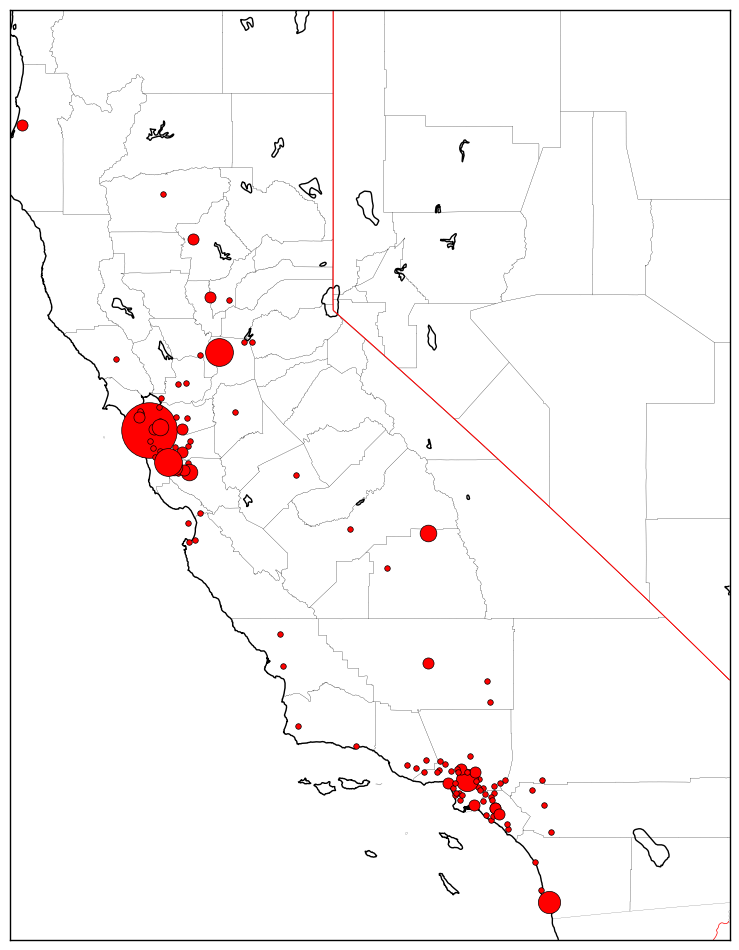

In [45]:
from mpl_toolkits.basemap import Basemap
import numpy as np
from geopy.geocoders import Nominatim
import math
from time import sleep
my_map = Basemap(llcrnrlon=-124.24, llcrnrlat=32.3, urcrnrlon=-114.8, urcrnrlat=42, resolution="h",projection="merc")
my_map.drawmapboundary()
my_map.drawcoastlines()
my_map.drawcounties()
my_map.drawstates(color = "r")
# load the shapefile, use the name 'city'
my_map
scale = 2
geolocator = Nominatim()
for (city,category) in zip(cities['city'].values, cities['category'].values):
    try:
        loc = geolocator.geocode(city, timeout=15)
        x, y = my_map(loc.longitude, loc.latitude)
        my_map.plot(x,y,marker='o',color='Red',markersize=int(category*scale))
        sleep(1)
    except AttributeError as e:
        print city,category
plt.show()